In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
cidade = 'saopaulo'

tmyx_base = 'TMYx_BRA_SP_Sao.Paulo-Congonhas.AP.837800_TMYx.2004-2018.epw'

#annex80
annex80_2010 = "ANNEX80_Sao_Paulo_2010.epw"
annex80_2050 = "ANNEX80_Sao_Paulo_2050.epw"
annex80_2090 = "ANNEX80_Sao_Paulo_2090.epw"

#swera
swera_base = "SWERA_BRA_Sao.Paulo-Congonhas.837800_SWERA.epw"
swera_2020 = "SWERA_SAO_PAULO_CONGONHAS__BRA_HADCM3_A2_2020_EPW.epw"
swera_2050 = "SWERA_SAO_PAULO_CONGONHAS__BRA_HADCM3_A2_2050_EPW.epw"
swera_2080 = "SWERA_SAO_PAULO_CONGONHAS__BRA_HADCM3_A2_2080_EPW.epw"

#try
try_base = "TRY_BRA_SP_Sao.Paulo-Congonhas.AP.837800_TRY.1954.epw"
try_2020 = "TRY_BRA_Sao Paulo-Congonhas AP_HadCM3-A2-2020.epw"
try_2050 = "TRY_BRA_Sao Paulo-Congonhas AP_HadCM3-A2-2050.epw"
try_2080 = "TRY_BRA_Sao Paulo-Congonhas AP_HadCM3-A2-2080.epw"

In [3]:
df_tmyx_base = pd.read_csv(tmyx_base, skiprows=[0,1,2,3,4,5,6,7], header=None, low_memory=False)
df_tmyx_base[35] = 'tmyx_2004_2018'

df_annex80_2010 = pd.read_csv(annex80_2010, skiprows=[0,1,2,3,4,5,6,7], header=None, low_memory=False)
df_annex80_2050 = pd.read_csv(annex80_2050, skiprows=[0,1,2,3,4,5,6,7], header=None, low_memory=False)
df_annex80_2090 = pd.read_csv(annex80_2090, skiprows=[0,1,2,3,4,5,6,7], header=None, low_memory=False)

df_annex80_2010[35] = 'annex80_2010'
df_annex80_2050[35] = 'annex80_2050'
df_annex80_2090[35] = 'annex80_2090'

df_swera_base = pd.read_csv(swera_base, skiprows=[0,1,2,3,4,5,6,7], header=None, low_memory=False)
df_swera_2020 = pd.read_csv(swera_2020, skiprows=[0,1,2,3,4,5,6,7], header=None, low_memory=False)
df_swera_2050 = pd.read_csv(swera_2050, skiprows=[0,1,2,3,4,5,6,7], header=None, low_memory=False)
df_swera_2080 = pd.read_csv(swera_2080, skiprows=[0,1,2,3,4,5,6,7], header=None, low_memory=False)

df_swera_base[35] = 'swera_base'
df_swera_2020[35] = 'swera_2020'
df_swera_2050[35] = 'swera_2050'
df_swera_2080[35] = 'swera_2080'

df_try_base = pd.read_csv(try_base, skiprows=[0,1,2,3,4,5,6,7], header=None, low_memory=False)
df_try_2020 = pd.read_csv(try_2020, skiprows=[0,1,2,3,4,5,6,7], header=None, low_memory=False)
df_try_2050 = pd.read_csv(try_2050, skiprows=[0,1,2,3,4,5,6,7], header=None, low_memory=False)
df_try_2080 = pd.read_csv(try_2080, skiprows=[0,1,2,3,4,5,6,7], header=None, low_memory=False)

df_try_base[35] = 'try_base'
df_try_2020[35] = 'try_2020'
df_try_2050[35] = 'try_2050'
df_try_2080[35] = 'try_2080'

In [4]:
df_annex80 = df_annex80_2010.append(df_annex80_2050.append(df_annex80_2090))
df_swera = df_swera_base.append(df_swera_2020.append(df_swera_2050.append(df_swera_2080)))
df_try = df_try_base.append(df_try_2020.append(df_try_2050.append(df_try_2080)))
df_try = df_try.iloc[:, 0:36]

In [5]:
df_annex80[1] = df_annex80[1].map("{:02}".format)
df_annex80[2] = df_annex80[2].map("{:02}".format)
df_annex80[3] = df_annex80[3].map("{:02}".format)

df_swera[1] = df_swera[1].map("{:02}".format)
df_swera[2] = df_swera[2].map("{:02}".format)
df_swera[3] = df_swera[3].map("{:02}".format)

df_try[1] = df_try[1].map("{:02}".format)
df_try[2] = df_try[2].map("{:02}".format)
df_try[3] = df_try[3].map("{:02}".format)

df_tmyx_base[1] = df_tmyx_base[1].map("{:02}".format)
df_tmyx_base[2] = df_tmyx_base[2].map("{:02}".format)
df_tmyx_base[3] = df_tmyx_base[3].map("{:02}".format)

In [6]:
df_annex80[3] = df_annex80[3].replace(['24'],'00')
df_swera[3] = df_swera[3].replace(['24'],'00')
df_try[3] = df_try[3].replace(['24'],'00')
df_tmyx_base[3] = df_tmyx_base[3].replace(['24'],'00')

In [7]:
df_annex80[0]=df_annex80[0].map(str)+'-'+df_annex80[1].map(str)+'-'+df_annex80[2].map(str)+' '+df_annex80[3].map(str)+':00:00'
df_swera[0]=df_swera[0].map(str)+'-'+df_swera[1].map(str)+'-'+df_swera[2].map(str)+' '+df_swera[3].map(str)+':00:00'
df_try[0]=df_try[0].map(str)+'-'+df_try[1].map(str)+'-'+df_try[2].map(str)+' '+df_try[3].map(str)+':00:00'
df_tmyx_base[0]=df_tmyx_base[0].map(str)+'-'+df_tmyx_base[1].map(str)+'-'+df_tmyx_base[2].map(str)+' '+df_tmyx_base[3].map(str)+':00:00'

In [8]:
df_annex80[0] = pd.to_datetime(df_annex80[0], infer_datetime_format=True)
df_swera[0] = pd.to_datetime(df_swera[0], infer_datetime_format=True)
df_try[0] = pd.to_datetime(df_try[0], infer_datetime_format=True)
df_tmyx_base[0] = pd.to_datetime(df_tmyx_base[0], infer_datetime_format=True)

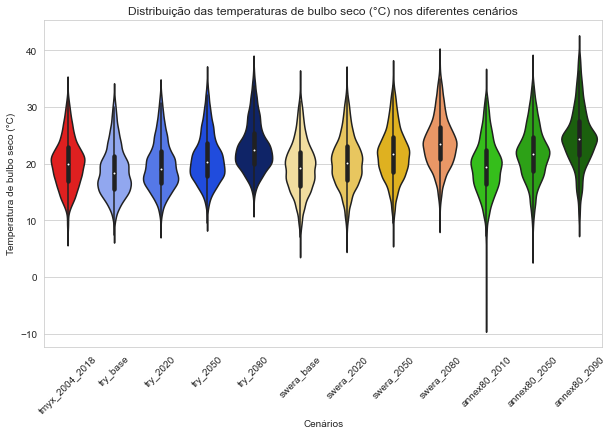

In [12]:
#violin plot TBS todos os cenários
violinscenarios_type_colors = ['#FF0000', # TMYx  
                    '#819FFF',  # TRY_base
                    '#3D6BFF',  # TRY_2020
                    '#003CFC',  # TRY_2050
                    '#001D76',  # TRY_2080
                    '#FFE491',  # SWERA_base
                    '#FFD248',  # SWERA_2020                               
                    '#FFC100',  # SWERA_2050
                    '#FF9250',  # SWERA_2080
                    '#22D900',  # ANNEX80_2010
                    '#1DB800',  # ANNEX80_2050
                    '#116E00',  # ANNEX80_2090                         
                   ]

df = df_tmyx_base.append(df_try.append(df_swera.append(df_annex80)))

plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
 
g=sns.violinplot(x=df[35], y=df[6], data=df, palette=violinscenarios_type_colors)

plt.title("Distribuição das temperaturas de bulbo seco (°C) nos diferentes cenários")
plt.ylabel("Temperatura de bulbo seco (°C)")
plt.xlabel("Cenários")
plt.xticks(rotation=45)
plt.show()

fig = g.get_figure()
fig.savefig(cidade+'_violin_tbs.png', bbox_inches='tight') 

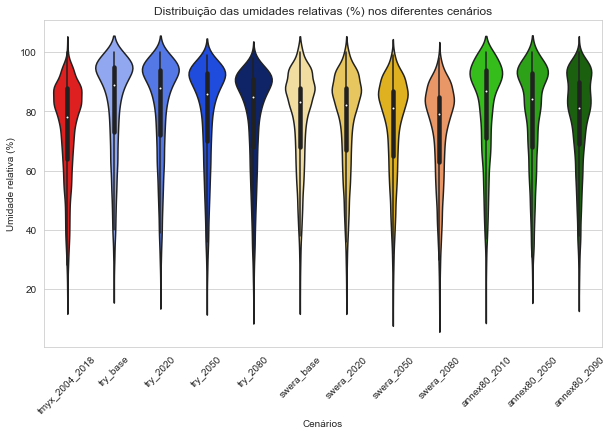

In [10]:
#violin plot UR todos os cenários
violinscenarios_type_colors = ['#FF0000', # TMYx  
                    '#819FFF',  # TRY_base
                    '#3D6BFF',  # TRY_2020
                    '#003CFC',  # TRY_2050
                    '#001D76',  # TRY_2080
                    '#FFE491',  # SWERA_base
                    '#FFD248',  # SWERA_2020                               
                    '#FFC100',  # SWERA_2050
                    '#FF9250',  # SWERA_2080
                    '#22D900',  # ANNEX80_2010
                    '#1DB800',  # ANNEX80_2050
                    '#116E00',  # ANNEX80_2090                         
                   ]

df = df_tmyx_base.append(df_try.append(df_swera.append(df_annex80)))

plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
 
g=sns.violinplot(x=df[35], y=df[8], data=df, palette=violinscenarios_type_colors)

plt.title("Distribuição das umidades relativas (%) nos diferentes cenários")
plt.ylabel("Umidade relativa (%)")
plt.xlabel("Cenários")
plt.xticks(rotation=45)
plt.show()

fig = g.get_figure()
fig.savefig(cidade+'_violin_rh.png', bbox_inches='tight') 

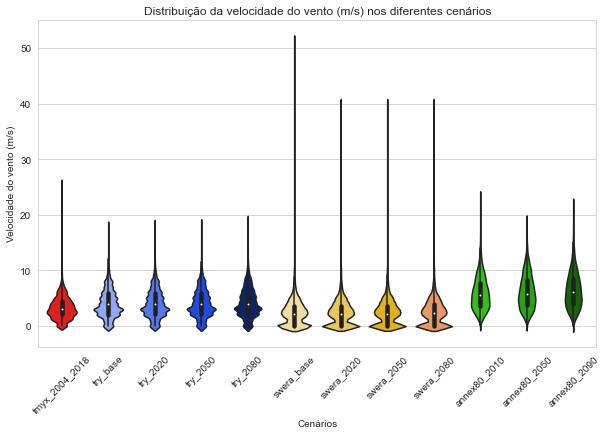

In [11]:
#violin plot velocidade do vento todos os cenários
violinscenarios_type_colors = ['#FF0000', # TMYx  
                    '#819FFF',  # TRY_base
                    '#3D6BFF',  # TRY_2020
                    '#003CFC',  # TRY_2050
                    '#001D76',  # TRY_2080
                    '#FFE491',  # SWERA_base
                    '#FFD248',  # SWERA_2020                               
                    '#FFC100',  # SWERA_2050
                    '#FF9250',  # SWERA_2080
                    '#22D900',  # ANNEX80_2010
                    '#1DB800',  # ANNEX80_2050
                    '#116E00',  # ANNEX80_2090                         
                   ]

df = df_tmyx_base.append(df_try.append(df_swera.append(df_annex80)))

plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
 
g=sns.violinplot(x=df[35], y=df[21], data=df, palette=violinscenarios_type_colors)

plt.title("Distribuição da velocidade do vento (m/s) nos diferentes cenários")
plt.ylabel("Velocidade do vento (m/s)")
plt.xlabel("Cenários")
plt.xticks(rotation=45)
plt.show()

fig = g.get_figure()
fig.savefig(cidade+'_violin_ws.png', bbox_inches='tight') 

In [10]:
scenarios_type_colors = ['#FFD656',  # SWERA_2050
                    '#FF9250',  # SWERA_2080
                    '#4C77FF',  # TRY_2050
                    '#002599',  # TRY_2080
                    '#22D900',  # ANNEX80_2050
                    '#116E00',  # ANNEX80_2090                         
                   ]

In [11]:
#dividindo nos cenários
df_annex80_2010 = df_annex80.loc[df_annex80[35] == 'annex80_2010']
df_annex80_2050 = df_annex80.loc[df_annex80[35] == 'annex80_2050']
df_annex80_2090 = df_annex80.loc[df_annex80[35] == 'annex80_2090']

df_swera_base = df_swera.loc[df_swera[35] == 'swera_base']
df_swera_2050 = df_swera.loc[df_swera[35] == 'swera_2050']
df_swera_2080 = df_swera.loc[df_swera[35] == 'swera_2080']

df_try_base = df_try.loc[df_try[35] == 'try_base']
df_try_2020 = df_try.loc[df_try[35] == 'try_2020']
df_try_2050 = df_try.loc[df_try[35] == 'try_2050']
df_try_2080 = df_try.loc[df_try[35] == 'try_2080']


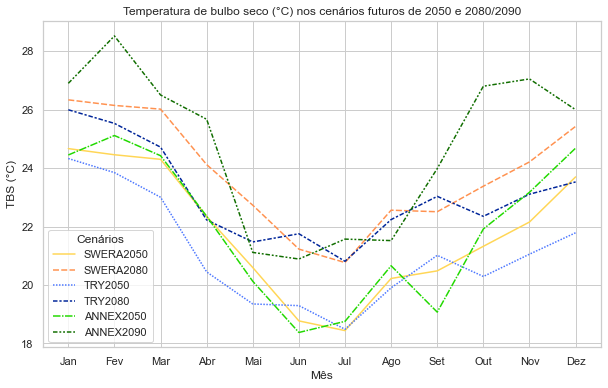

In [20]:
#swera try e annex80

#gráfico da temperatura de bulbo seco média mensal para cada cenário

df_swera_2050_meanmonth = df_swera_2050.groupby([df_swera_2050[0].dt.month])[6].mean()
df_swera_2080_meanmonth = df_swera_2080.groupby([df_swera_2080[0].dt.month])[6].mean()

df_try_2050_meanmonth = df_try_2050.groupby([df_try_2050[0].dt.month])[6].mean()
df_try_2080_meanmonth = df_try_2080.groupby([df_try_2080[0].dt.month])[6].mean()

df_annex80_2050_meanmonth = df_annex80_2050.groupby([df_annex80_2050[0].dt.month])[6].mean()
df_annex80_2090_meanmonth = df_annex80_2090.groupby([df_annex80_2090[0].dt.month])[6].mean()

df_dbt_meanmonth = pd.DataFrame(dict(time=('Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'),
                                     dbt_swera_2050=df_swera_2050_meanmonth,dbt_swera_2080=df_swera_2080_meanmonth,
                                     dbt_try_2050=df_try_2050_meanmonth,dbt_try_2080=df_try_2080_meanmonth,
                                     dbt_annex80_2050=df_annex80_2050_meanmonth,dbt_annex80_2090=df_annex80_2090_meanmonth                                    
                                    ))
df_dbt_meanmonth

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
g = sns.lineplot(x='time', y='value', hue='variable', style='variable',
             data=pd.melt(df_dbt_meanmonth, ['time']), palette=scenarios_type_colors)


plt.xlabel("Mês")
plt.ylabel("TBS (°C)")
plt.title("Temperatura de bulbo seco (°C) nos cenários futuros de 2050 e 2080/2090")
plt.legend(title='Cenários', labels=['SWERA2050', 'SWERA2080', 'TRY2050', 'TRY2080', 'ANNEX2050', 'ANNEX2090'])
plt.show(g)

fig = g.get_figure()
fig.savefig(cidade+'_tbs.png', bbox_inches='tight')  


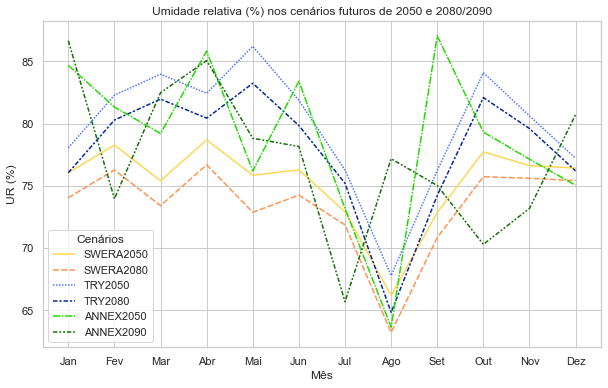

In [55]:

#gráfico da umidade relativa média mensal para cada cenário

df_swera_2050_meanmonth = df_swera_2050.groupby([df_swera_2050[0].dt.month])[8].mean()
df_swera_2080_meanmonth = df_swera_2080.groupby([df_swera_2080[0].dt.month])[8].mean()

df_try_2050_meanmonth = df_try_2050.groupby([df_try_2050[0].dt.month])[8].mean()
df_try_2080_meanmonth = df_try_2080.groupby([df_try_2080[0].dt.month])[8].mean()

df_annex80_2050_meanmonth = df_annex80_2050.groupby([df_annex80_2050[0].dt.month])[8].mean()
df_annex80_2090_meanmonth = df_annex80_2090.groupby([df_annex80_2090[0].dt.month])[8].mean()

df_rh_meanmonth = pd.DataFrame(dict(time=('Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'),
                                     rh_swera_2050=df_swera_2050_meanmonth,rh_swera_2080=df_swera_2080_meanmonth,
                                     rh_try_2050=df_try_2050_meanmonth,rh_try_2080=df_try_2080_meanmonth,
                                     rh_annex80_2050=df_annex80_2050_meanmonth,rh_annex80_2090=df_annex80_2090_meanmonth                                    
                                    ))

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
g = sns.lineplot(x='time', y='value', hue='variable',  style='variable',
             data=pd.melt(df_rh_meanmonth, ['time']), palette=scenarios_type_colors)


plt.xlabel("Mês")
plt.ylabel("UR (%)")
plt.title("Umidade relativa (%) nos cenários futuros de 2050 e 2080/2090")
plt.legend(title='Cenários', labels=['SWERA2050', 'SWERA2080', 'TRY2050', 'TRY2080', 'ANNEX2050', 'ANNEX2090'])
plt.show(g)

fig = g.get_figure()
fig.savefig(cidade+'_rh.png', bbox_inches='tight') 

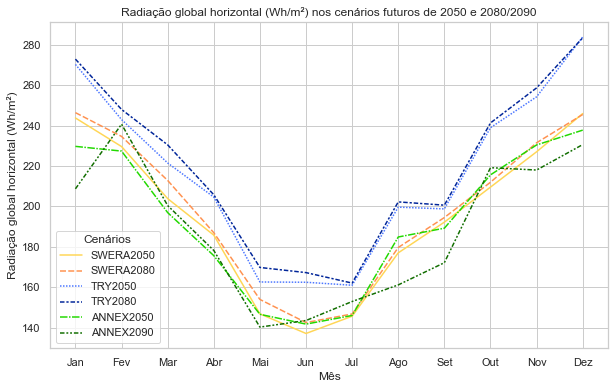

In [57]:
#gráfico da radiação global horizontal média mensal para cada cenário

df_swera_2050_meanmonth = df_swera_2050.groupby([df_swera_2050[0].dt.month])[13].mean()
df_swera_2080_meanmonth = df_swera_2080.groupby([df_swera_2080[0].dt.month])[13].mean()

df_try_2050_meanmonth = df_try_2050.groupby([df_try_2050[0].dt.month])[13].mean()
df_try_2080_meanmonth = df_try_2080.groupby([df_try_2080[0].dt.month])[13].mean()

df_annex80_2050_meanmonth = df_annex80_2050.groupby([df_annex80_2050[0].dt.month])[13].mean()
df_annex80_2090_meanmonth = df_annex80_2090.groupby([df_annex80_2090[0].dt.month])[13].mean()

df_ghi_meanmonth = pd.DataFrame(dict(time=('Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'),
                                     ghi_swera_2050=df_swera_2050_meanmonth,ghi_swera_2080=df_swera_2080_meanmonth,
                                     ghi_try_2050=df_try_2050_meanmonth,ghi_try_2080=df_try_2080_meanmonth,
                                     ghi_annex80_2050=df_annex80_2050_meanmonth,ghi_annex80_2090=df_annex80_2090_meanmonth                                    
                                    ))

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
g = sns.lineplot(x='time', y='value', hue='variable',  style='variable',
             data=pd.melt(df_ghi_meanmonth, ['time']), palette=scenarios_type_colors)


plt.xlabel("Mês")
plt.ylabel("Radiação global horizontal (Wh/m²)")
plt.title("Radiação global horizontal (Wh/m²) nos cenários futuros de 2050 e 2080/2090")
plt.legend(title='Cenários', labels=['SWERA2050', 'SWERA2080', 'TRY2050', 'TRY2080', 'ANNEX2050', 'ANNEX2090'])
plt.show(g)

fig = g.get_figure()
fig.savefig(cidade+'_ghi.png', bbox_inches='tight') 

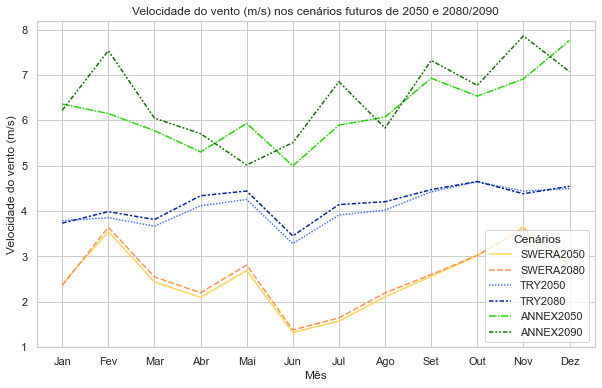

In [21]:
#gráfico da velocidade do vendo média mensal para cada cenário

df_swera_2050_meanmonth = df_swera_2050.groupby([df_swera_2050[0].dt.month])[21].mean()
df_swera_2080_meanmonth = df_swera_2080.groupby([df_swera_2080[0].dt.month])[21].mean()

df_try_2050_meanmonth = df_try_2050.groupby([df_try_2050[0].dt.month])[21].mean()
df_try_2080_meanmonth = df_try_2080.groupby([df_try_2080[0].dt.month])[21].mean()

df_annex80_2050_meanmonth = df_annex80_2050.groupby([df_annex80_2050[0].dt.month])[21].mean()
df_annex80_2090_meanmonth = df_annex80_2090.groupby([df_annex80_2090[0].dt.month])[21].mean()

df_ws_meanmonth = pd.DataFrame(dict(time=('Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'),
                                     ws_swera_2050=df_swera_2050_meanmonth,ws_swera_2080=df_swera_2080_meanmonth,
                                     ws_try_2050=df_try_2050_meanmonth,ws_try_2080=df_try_2080_meanmonth,
                                     ws_annex80_2050=df_annex80_2050_meanmonth,ws_annex80_2090=df_annex80_2090_meanmonth                                    
                                    ))

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
g = sns.lineplot(x='time', y='value', hue='variable',  style='variable',
             data=pd.melt(df_ws_meanmonth, ['time']), palette=scenarios_type_colors)


plt.xlabel("Mês")
plt.ylabel("Velocidade do vento (m/s)")
plt.title("Velocidade do vento (m/s) nos cenários futuros de 2050 e 2080/2090")
plt.legend(title='Cenários', labels=['SWERA2050', 'SWERA2080', 'TRY2050', 'TRY2080', 'ANNEX2050', 'ANNEX2090'])
plt.show(g)

fig = g.get_figure()
fig.savefig(cidade+'_ws.png', bbox_inches='tight') 